### library

In [17]:
from StandfordCitationNetworkAnalysis.CitationNetworkBuilder import CitationNetworkBuilder

In [1]:
import Framework

In [2]:
import pickle

In [160]:
from Framework.NodeContainer import NodeContainer
from StanfordCitationNetwork.CitationPaperNode import CitationPaperNode
import networkx as nx
import pandas as pd

from Framework import UtilFuncs




class CoauthorNetworkBuilder:
    def __init__(self) -> None:
        pass

    def find_max_cen(self, group):
        max_cen = group['DegreeCentrality'].max()
        max_score = group['ClosenessCentrality'].max()
        selected_rows =  group[(group['DegreeCentrality'] == max_cen) & (group['ClosenessCentrality'] == max_score)]
        return selected_rows.assign(
        Degree_Centrality_sum=group['DegreeCentrality'].sum(),
        Closeness_Centrality_sum=group['ClosenessCentrality'].sum())

    def BuildCoauthorDataFrame(self, data_container :NodeContainer, output_path):
        paper_map = data_container.GetAllNodesByType("CitationPaperNode")

        graph_dict = {}

        from_year = 1993
        to_year = 2003
        # from 1993 to 2003
        for cur_year in range(from_year, to_year + 1):
            coauthor_graph = nx.DiGraph()
            paper_name_dict = {}
            paper_node :CitationPaperNode = None
            for paper_id in paper_map:
                # add this paper's ID
                paper_node = paper_map[paper_id]
                if paper_node.Dt.year <= cur_year:
                    first_author = paper_node.AuthorNames[0]
                    coauthor_graph.add_node(first_author)
                    if first_author in paper_name_dict:
                        paper_name_dict[first_author]['paper'].append(paper_node.Name)
                    else:
                        paper_name_dict[first_author] = {'paper': [paper_node.Name], 'author':'first', 'paper_id':paper_id}
                    if len(paper_node.AuthorNames)>1:
                        for coauthor_name in paper_node.AuthorNames[1:]:
                            # citation_paper :CitationPaperNode = data_container.FindNodeWithType("CitationPaperNode", citation_paperid)
                            # if citation_paper.Dt.year <= cur_year:
                            coauthor_graph.add_node(coauthor_name)
                            coauthor_graph.add_edge(coauthor_name, first_author)
                            if coauthor_name in paper_name_dict:
                                paper_name_dict[coauthor_name]['paper'].append(paper_node.Name)
                            else:
                                paper_name_dict[coauthor_name] = {'paper': [paper_node.Name], 'author':'second', 'paper_id':paper_id}
            nx.set_node_attributes(coauthor_graph, paper_name_dict)
            graph_dict[cur_year] = coauthor_graph
        # degree centrality
        degree_centrality_map = {}
        closeness_centrality_map = {}
        for cur_year in range(from_year, to_year + 1):
            graph = graph_dict[cur_year]
            degree_map = nx.degree_centrality(graph)
            close_degree_map = nx.closeness_centrality(graph)
            degree_centrality_map[cur_year] = degree_map
            closeness_centrality_map[cur_year] = close_degree_map

        # betweenness centrality
        
        # betweenness_centrality_map = {}
        # for cur_year in range(from_year, to_year + 1):
        #     graph = graph_dict[cur_year]
        #     betweenness_map = nx.betweenness_centrality(graph)
        #     betweenness_centrality_map[cur_year] = betweenness_map
        

        df = pd.DataFrame()
        nodeid_list = []
        year_list = []
        degreecen_list = []
        closeness_list = []
        paper_name_list = []
        authorship= []

        paper_id_list = []
        for cur_year in range(from_year, to_year + 1):
            cur_graph :nx.DiGraph = graph_dict[cur_year]
            degree_cen = degree_centrality_map[cur_year]
            closeness_cen = closeness_centrality_map[cur_year]
            for node_id, attr in cur_graph.nodes(data=True):
                # node id
                nodeid_list.append(node_id)
                year_list.append(cur_year)
                degree_centrality = degree_cen[node_id]
                close_centrality = closeness_cen[node_id]
                degreecen_list.append(degree_centrality)
                closeness_list.append(close_centrality)
                print(attr)
                paper_name_list.append(attr['paper'])
                authorship.append(attr['author'])
                paper_id_list.append(attr['paper_id'])
            
        df['NodeID'] = paper_id_list

        df['Year'] = year_list
        df['DegreeCentrality'] = degreecen_list
        df['ClosenessCentrality'] = closeness_list

        
        grouped = df.groupby(['NodeID', 'Year'])
        # Apply the function to each group
        highest_df = grouped.apply(self.find_max_cen)

        # Reset index to obtain a flat DataFrame
        highest_df = highest_df.reset_index(drop=True)

        return highest_df

        #pd.DataFrame()
        pass 

In [165]:
class CoauthorNetworkBuilder:
    def __init__(self) -> None:
        pass

    def find_max_cen(self, group):
        max_cen = group['DegreeCentrality'].max()
        max_score = group['ClosenessCentrality'].max()
        selected_rows =  group[(group['DegreeCentrality'] == max_cen) & (group['ClosenessCentrality'] == max_score)]
        return selected_rows.assign(
        Degree_Centrality_sum=group['DegreeCentrality'].sum(),
        Closeness_Centrality_sum=group['ClosenessCentrality'].sum())

    def BuildCoauthorDataFrame(self, data_container :NodeContainer):
        paper_map = data_container.GetAllNodesByType("CitationPaperNode")

        graph_dict = {}

        from_year = 1992
        to_year = 2003
        # from 1993 to 2003
        for cur_year in range(from_year, to_year + 1):
            # the coauthor grpah is directional graph
            coauthor_graph = nx.DiGraph()
            #paper_name_dict = {}
            paper_node :CitationPaperNode = None
            for paper_id in paper_map:
                # add this paper's ID
                paper_node = paper_map[paper_id]
                if paper_node.Dt.year <= cur_year:
                    # first author
                    first_author = paper_node.AuthorNames[0]
                    coauthor_graph.add_node(first_author)
                    #if first_author in paper_name_dict:
                    #    paper_name_dict[first_author]['paper'].append(paper_node.Name)
                    #else:
                    #    paper_name_dict[first_author] = {'paper': [paper_node.Name], 'author':'first', 'paper_id':paper_id}
                    if len(paper_node.AuthorNames)>1:
                        for coauthor_name in paper_node.AuthorNames[1:]:
                            # citation_paper :CitationPaperNode = data_container.FindNodeWithType("CitationPaperNode", citation_paperid)
                            # if citation_paper.Dt.year <= cur_year:
                            coauthor_graph.add_node(coauthor_name)
                            coauthor_graph.add_edge(coauthor_name, first_author)
                            #if coauthor_name in paper_name_dict:
                            #    paper_name_dict[coauthor_name]['paper'].append(paper_node.Name)
                            #else:
                            #    paper_name_dict[coauthor_name] = {'paper': [paper_node.Name], 'author':'second', 'paper_id':paper_id}
            #nx.set_node_attributes(coauthor_graph, paper_name_dict)
            graph_dict[cur_year] = coauthor_graph
        # degree centrality
        degree_centrality_map = {}
        closeness_centrality_map = {}
        for cur_year in range(from_year, to_year + 1):
            graph = graph_dict[cur_year]
            degree_map = nx.degree_centrality(graph)
            closecen_map = nx.closeness_centrality(graph)
            degree_centrality_map[cur_year] = degree_map
            closeness_centrality_map[cur_year] = closecen_map

        # betweenness centrality
        
        # betweenness_centrality_map = {}
        # for cur_year in range(from_year, to_year + 1):
        #     graph = graph_dict[cur_year]
        #     betweenness_map = nx.betweenness_centrality(graph)
        #     betweenness_centrality_map[cur_year] = betweenness_map
        

        df = pd.DataFrame()
        # nodeid_list = []
        paper_id_list = []
        year_list = []
        max_degreecen_list = []
        max_closecen_list = []
        sum_degreecen_list = []
        sum_closecen_list = []

        # degreecen_list = []
        # closeness_list = []
        # paper_name_list = []
        # authorship= []

        
        for cur_year in range(from_year, to_year + 1):
            
            curyear_degreecen_map = degree_centrality_map[cur_year]
            curyear_closenesscen_map = closeness_centrality_map[cur_year]
            for paper_id in paper_map:
                paper_node :CitationPaperNode = paper_map[paper_id]
                if paper_node.Dt.year <= cur_year:
                    paper_id_list.append(paper_id)
                    year_list.append(cur_year)
                    # the degree centralities of all authors
                    authors_degree_cenlist = []
                    # the closeness centralities of all authors
                    authors_closeness_cenlist = []
                    for author_name in paper_node.AuthorNames:
                        # degree centrality
                        degree_centrality = curyear_degreecen_map[author_name]
                        # closeness centrality
                        closeness_centrality = curyear_closenesscen_map[author_name]
                        authors_degree_cenlist.append(degree_centrality)
                        authors_closeness_cenlist.append(closeness_centrality)
                    # now find the max degree centrality 
                    max_degree_cen = np.max(authors_degree_cenlist)
                    # find the max closeness centrality
                    max_close_cen = np.max(authors_closeness_cenlist)
                    # sum the degree centrality
                    sum_degree_cen = np.sum(authors_degree_cenlist)
                    # sum the closenes c entrality
                    sum_close_cen = np.sum(authors_closeness_cenlist)
                    max_degreecen_list.append(max_degree_cen)
                    max_closecen_list.append(max_close_cen)
                    sum_degreecen_list.append(sum_degree_cen)
                    sum_closecen_list.append(sum_close_cen)
                
                    




        # for cur_year in range(from_year, to_year + 1):
        #     cur_graph :nx.DiGraph = graph_dict[cur_year]
        #     degree_centrality_map = degree_centrality_map[cur_year]
        #     closeness_centrality_map = closeness_centrality_map[cur_year]
        #     for node_id, attr in cur_graph.nodes(data=True):
        #         # node id
        #         nodeid_list.append(node_id)
        #         year_list.append(cur_year)
        #         degree_centrality = degree_centrality_map[node_id]
        #         close_centrality = closeness_centrality_map[node_id]
        #         degreecen_list.append(degree_centrality)
        #         closeness_list.append(close_centrality)
        #         print(attr)
        #         paper_name_list.append(attr['paper'])
        #         authorship.append(attr['author'])
        #         paper_id_list.append(attr['paper_id'])
            
        df['NodeID'] = paper_id_list

        df['Year'] = year_list
        df['AuthorDegreeCentrality_Max'] = max_degreecen_list
        df['AuthorClosenessCentrality_Max'] = max_closecen_list
        df['AuthorDegreeCentrality_Sum'] = sum_degreecen_list
        df['AuthorClosenessCentrality_Sum'] = sum_closecen_list

        
        # grouped = df.groupby(['NodeID', 'Year'])
        # # Apply the function to each group
        # highest_df = grouped.apply(self.find_max_cen)

        # # Reset index to obtain a flat DataFrame
        # highest_df = highest_df.reset_index(drop=True)

        # UtilFuncs.PickleWrite(df, output_path)
        return graph_dict
        #pd.DataFrame()
        pass 

In [217]:
class CitationNetworkBuilder:
    def __init__(self) -> None:
        pass

    def BuildCitationDataFrame(self, data_container :NodeContainer):
        paper_map = data_container.GetAllNodesByType("CitationPaperNode")

        graph_dict = {}

        from_year = 1992
        to_year = 2003
        # from 1993 to 2003
        for cur_year in range(from_year, to_year + 1):
            citation_graph = nx.DiGraph()

            paper_node :CitationPaperNode = None
            for paper_id in paper_map:
                # add this paper's ID
                paper_node = paper_map[paper_id]
                if paper_node.Dt.year <= cur_year:
                    citation_graph.add_node(paper_node.ID)
                    for citation_paperid in paper_node.ReferenceIDs:
                        citation_paper :CitationPaperNode = data_container.FindNodeWithType("CitationPaperNode", citation_paperid)
                        if citation_paper.Dt.year <= cur_year:
                            citation_graph.add_node(citation_paperid)
                            citation_graph.add_edge(paper_node.ID, citation_paperid)
            graph_dict[cur_year] = citation_graph
        return graph_dict

In [166]:
coauthor_graph_builder = CoauthorNetworkBuilder()

In [168]:
g = coauthor_graph_builder.BuildCoauthorDataFrame(citation_node)

In [218]:
citation_graph_builder = CitationNetworkBuilder()

In [219]:
g_cite = citation_graph_builder.BuildCitationDataFrame(citation_node)

In [171]:
G = g[2003]

### co-author graph vis

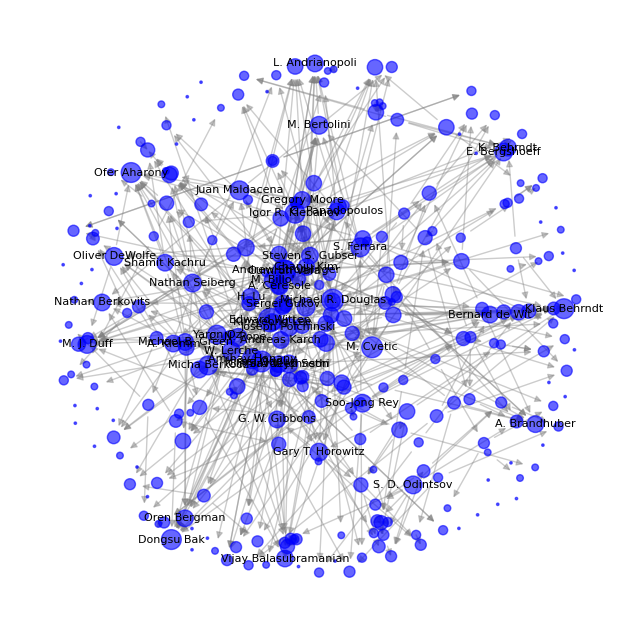

In [204]:
import networkx as nx
from operator import itemgetter
import matplotlib.pyplot as plt

from ArxivCrawler.ArxivAuthorRelationship import ArxivAuthorRelationship
from ArxivCrawler.ArxivAuthorRelationshipCollection import ArxivAuthorRelationshipCollection
# Assuming 'subgraph' has already been defined with the top 500 nodes by degree
# Set the seed for reproducibility
G = g[2003]
seed = 13648
# Sort nodes by degree and get the top 500
top_nodes = sorted(G.degree(), key=itemgetter(1), reverse=True)[:300]
 
# Extract just the node names from the top_nodes
top_nodes = [node for node, degree in top_nodes]

# Create a subgraph with just the top 500 nodes
subgraph = G.subgraph(top_nodes)
# Compute the positions of the nodes using one of the layout algorithms
pos = nx.spring_layout(subgraph, seed=seed)
 
# Define node sizes based on degree
node_sizes = [3 + 20 * subgraph.degree(n) for n in subgraph.nodes()]

# Optionally, define node labels for nodes with the highest degrees
# Selecting the top X nodes by degree to label
top_degree_nodes = sorted(subgraph.degree(), key=itemgetter(1), reverse=True)[:50]  # Adjust X to your preference
node_labels = {node: node for node, _ in top_degree_nodes}
# Change plot size here
plt.figure(figsize=(8, 8))  # Set the figure size (width, height) in inches

# Draw the nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='blue', alpha=0.6)

# Draw the edges
edges = nx.draw_networkx_edges(
    subgraph,
    pos,
    width=1,
    edge_color='gray',
    alpha=0.4  # Adjust edge transparency
)

# Draw the node labels for the top X nodes
nx.draw_networkx_labels(subgraph, pos, labels=node_labels, font_size=8)
# plt.figure(figsize=(15, 10))
plt.axis('off')  # Turn off the axis
plt.show()

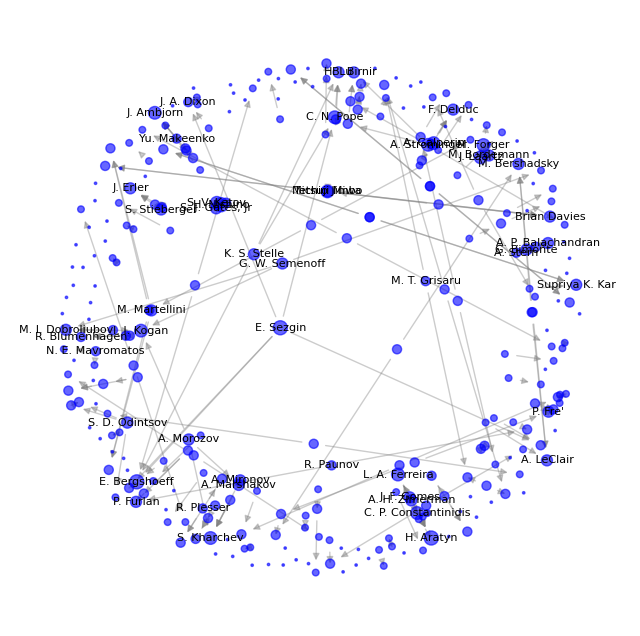

In [205]:
G = g[1992]
eed = 13648
# Sort nodes by degree and get the top 500
top_nodes = sorted(G.degree(), key=itemgetter(1), reverse=True)[:300]
 
# Extract just the node names from the top_nodes
top_nodes = [node for node, degree in top_nodes]

# Create a subgraph with just the top 500 nodes
subgraph = G.subgraph(top_nodes)
# Compute the positions of the nodes using one of the layout algorithms
pos = nx.spring_layout(subgraph, seed=seed)
 
# Define node sizes based on degree
node_sizes = [3 + 20 * subgraph.degree(n) for n in subgraph.nodes()]

# Optionally, define node labels for nodes with the highest degrees
# Selecting the top X nodes by degree to label
top_degree_nodes = sorted(subgraph.degree(), key=itemgetter(1), reverse=True)[:50]  # Adjust X to your preference
node_labels = {node: node for node, _ in top_degree_nodes}
# Change plot size here
plt.figure(figsize=(8, 8))  # Set the figure size (width, height) in inches

# Draw the nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='blue', alpha=0.6)

# Draw the edges
edges = nx.draw_networkx_edges(
    subgraph,
    pos,
    width=1,
    edge_color='gray',
    alpha=0.4  # Adjust edge transparency
)

# Draw the node labels for the top X nodes
nx.draw_networkx_labels(subgraph, pos, labels=node_labels, font_size=8)
# plt.figure(figsize=(15, 10))
plt.axis('off')  # Turn off the axis
plt.show()


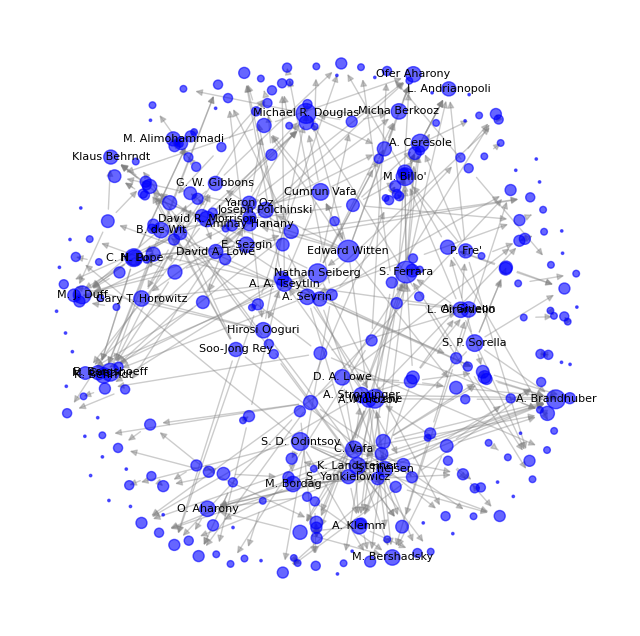

In [206]:
G = g[1998]
eed = 13648
# Sort nodes by degree and get the top 500
top_nodes = sorted(G.degree(), key=itemgetter(1), reverse=True)[:300]
 
# Extract just the node names from the top_nodes
top_nodes = [node for node, degree in top_nodes]

# Create a subgraph with just the top 500 nodes
subgraph = G.subgraph(top_nodes)
# Compute the positions of the nodes using one of the layout algorithms
pos = nx.spring_layout(subgraph, seed=seed)
 
# Define node sizes based on degree
node_sizes = [3 + 20 * subgraph.degree(n) for n in subgraph.nodes()]

# Optionally, define node labels for nodes with the highest degrees
# Selecting the top X nodes by degree to label
top_degree_nodes = sorted(subgraph.degree(), key=itemgetter(1), reverse=True)[:50]  # Adjust X to your preference
node_labels = {node: node for node, _ in top_degree_nodes}
# Change plot size here
plt.figure(figsize=(8, 8))  # Set the figure size (width, height) in inches

# Draw the nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='blue', alpha=0.6)

# Draw the edges
edges = nx.draw_networkx_edges(
    subgraph,
    pos,
    width=1,
    edge_color='gray',
    alpha=0.4  # Adjust edge transparency
)

# Draw the node labels for the top X nodes
nx.draw_networkx_labels(subgraph, pos, labels=node_labels, font_size=8)
# plt.figure(figsize=(15, 10))
plt.axis('off')  # Turn off the axis
plt.show()


### citation graph vis

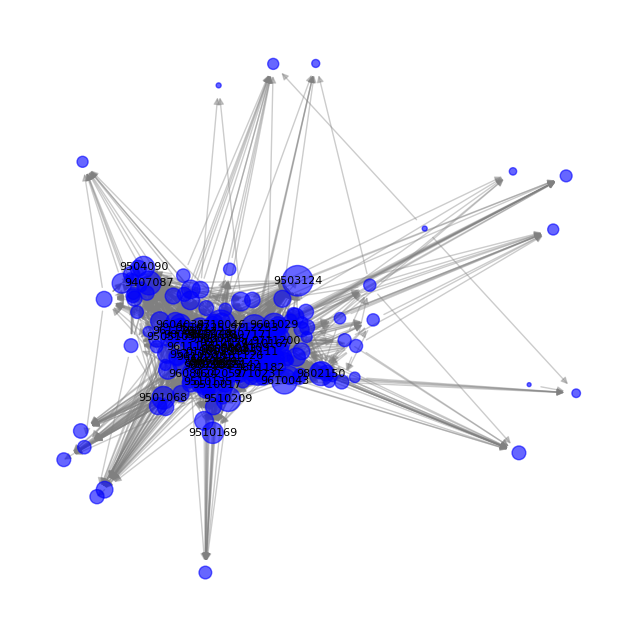

In [231]:

# Assuming 'subgraph' has already been defined with the top 500 nodes by degree
# Set the seed for reproducibility
G = g_cite[2003]
seed = 1334
# Sort nodes by degree and get the top 500
top_nodes = sorted(G.degree(), key=itemgetter(1), reverse=True)[:300]
 
# Extract just the node names from the top_nodes
top_nodes = [node for node, degree in top_nodes]

# Create a subgraph with just the top 500 nodes
subgraph = G.subgraph(top_nodes)
# Compute the positions of the nodes using one of the layout algorithms
pos = nx.spring_layout(subgraph, seed=seed)
 
# Define node sizes based on degree
node_sizes = [3 + 5 * subgraph.degree(n) for n in subgraph.nodes()]

# Optionally, define node labels for nodes with the highest degrees
# Selecting the top X nodes by degree to label
top_degree_nodes = sorted(subgraph.degree(), key=itemgetter(1), reverse=True)[:50]  # Adjust X to your preference
node_labels = {node: node for node, _ in top_degree_nodes}
# Change plot size here
plt.figure(figsize=(8, 8))  # Set the figure size (width, height) in inches

# Draw the nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='blue', alpha=0.6)

# Draw the edges
edges = nx.draw_networkx_edges(
    subgraph,
    pos,
    width=1,
    edge_color='gray',
    alpha=0.4  # Adjust edge transparency
)

# Draw the node labels for the top X nodes
nx.draw_networkx_labels(subgraph, pos, labels=node_labels, font_size=8)
# plt.figure(figsize=(15, 10))
plt.axis('off')  # Turn off the axis
plt.show()

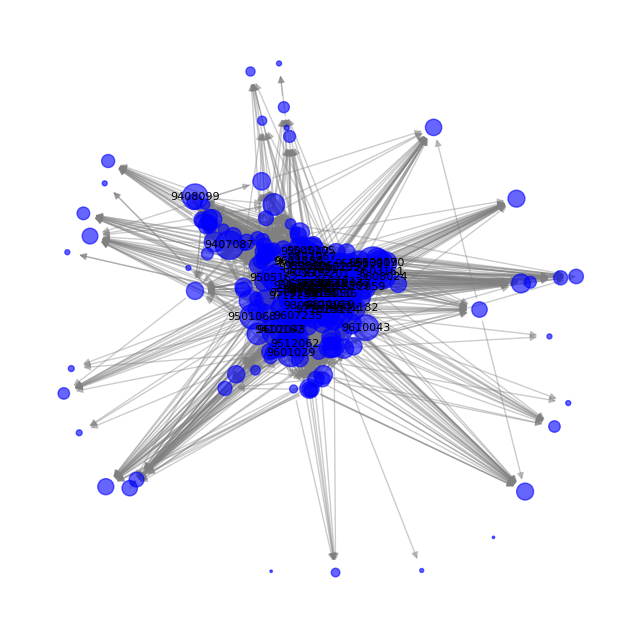

In [230]:
# Assuming 'subgraph' has already been defined with the top 500 nodes by degree
# Set the seed for reproducibility
G = g_cite[1998]
seed = 1334
# Sort nodes by degree and get the top 500
top_nodes = sorted(G.degree(), key=itemgetter(1), reverse=True)[:300]
 
# Extract just the node names from the top_nodes
top_nodes = [node for node, degree in top_nodes]

# Create a subgraph with just the top 500 nodes
subgraph = G.subgraph(top_nodes)
# Compute the positions of the nodes using one of the layout algorithms
pos = nx.spring_layout(subgraph, seed=seed)
 
# Define node sizes based on degree
node_sizes = [3 + 5 * subgraph.degree(n) for n in subgraph.nodes()]

# Optionally, define node labels for nodes with the highest degrees
# Selecting the top X nodes by degree to label
top_degree_nodes = sorted(subgraph.degree(), key=itemgetter(1), reverse=True)[:50]  # Adjust X to your preference
node_labels = {node: node for node, _ in top_degree_nodes}
# Change plot size here
plt.figure(figsize=(8, 8))  # Set the figure size (width, height) in inches

# Draw the nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='blue', alpha=0.6)

# Draw the edges
edges = nx.draw_networkx_edges(
    subgraph,
    pos,
    width=1,
    edge_color='gray',
    alpha=0.4  # Adjust edge transparency
)

# Draw the node labels for the top X nodes
nx.draw_networkx_labels(subgraph, pos, labels=node_labels, font_size=8)
# plt.figure(figsize=(15, 10))
plt.axis('off')  # Turn off the axis
plt.show()

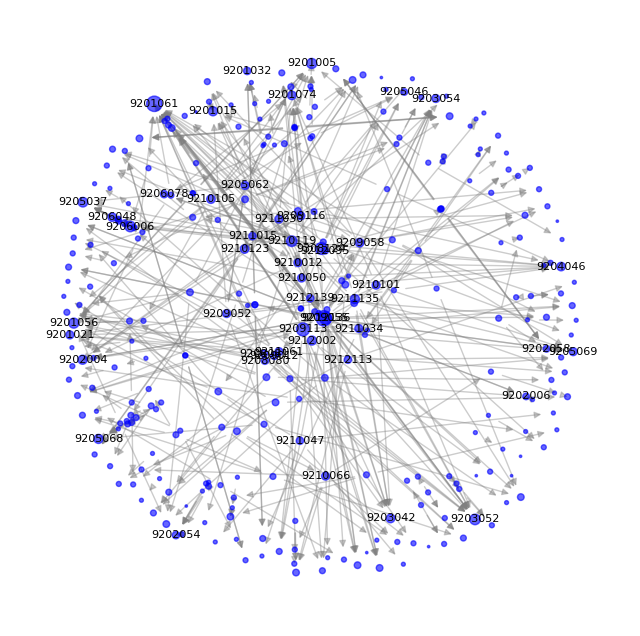

In [229]:
# Assuming 'subgraph' has already been defined with the top 500 nodes by degree
# Set the seed for reproducibility
G = g_cite[1992]
seed = 1334
# Sort nodes by degree and get the top 500
top_nodes = sorted(G.degree(), key=itemgetter(1), reverse=True)[:300]
 
# Extract just the node names from the top_nodes
top_nodes = [node for node, degree in top_nodes]

# Create a subgraph with just the top 500 nodes
subgraph = G.subgraph(top_nodes)
# Compute the positions of the nodes using one of the layout algorithms
pos = nx.spring_layout(subgraph, seed=seed)
 
# Define node sizes based on degree
node_sizes = [3 + 5 * subgraph.degree(n) for n in subgraph.nodes()]

# Optionally, define node labels for nodes with the highest degrees
# Selecting the top X nodes by degree to label
top_degree_nodes = sorted(subgraph.degree(), key=itemgetter(1), reverse=True)[:50]  # Adjust X to your preference
node_labels = {node: node for node, _ in top_degree_nodes}
# Change plot size here
plt.figure(figsize=(8, 8))  # Set the figure size (width, height) in inches

# Draw the nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='blue', alpha=0.6)

# Draw the edges
edges = nx.draw_networkx_edges(
    subgraph,
    pos,
    width=1,
    edge_color='gray',
    alpha=0.4  # Adjust edge transparency
)

# Draw the node labels for the top X nodes
nx.draw_networkx_labels(subgraph, pos, labels=node_labels, font_size=8)
# plt.figure(figsize=(15, 10))
plt.axis('off')  # Turn off the axis
plt.show()

### co-author degree distribution

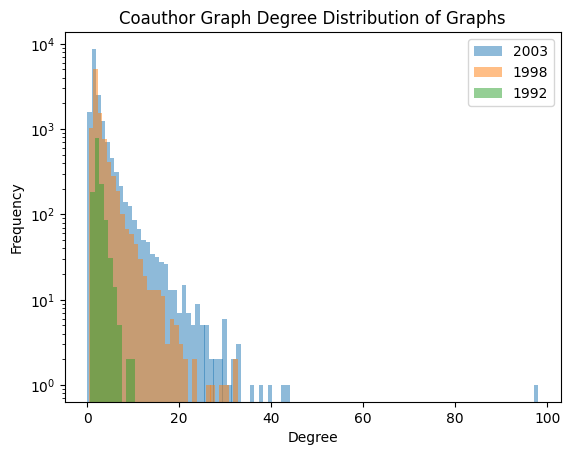

In [208]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_degree_distributions(graphs, labels, bins=100):
  """
  Plots the degree distributions of multiple graphs in one histogram.

  Args:
    graphs: A list of NetworkX graph objects.
    labels: A list of labels for each graph (corresponding to the order in graphs).
    bins: The number of bins for the histogram.
  """

  # Calculate degree sequences for each graph
  degree_sequences = [sorted([d for n, d in g.degree()], reverse=True) for g in graphs]

  # Plot histograms
  plt.hist(degree_sequences, bins=bins, label=labels, alpha=0.5, width=1,rwidth=10, log=True)  # alpha for transparency

  plt.xlabel("Degree")
  plt.ylabel("Frequency")
  plt.title("Coauthor Graph Degree Distribution of Graphs")
  plt.legend()
  plt.show()

# Example usage (assuming you have three graphs G1, G2, G3)
plot_degree_distributions([g[2003], g[1998], g[1992]], ["2003", "1998", "1992"])

### citation degree distribution

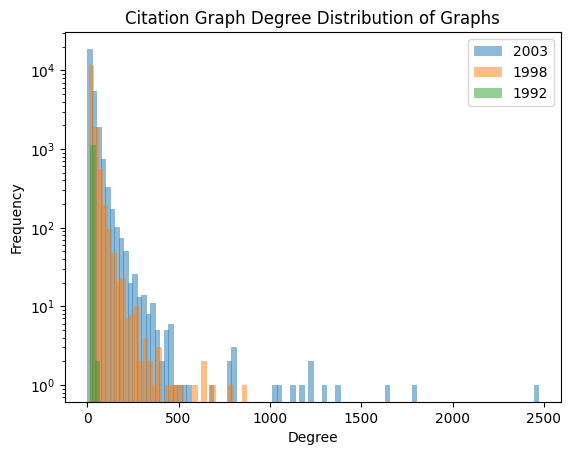

In [239]:
def plot_degree_distributions(graphs, labels, bins=100):
  """
  Plots the degree distributions of multiple graphs in one histogram.

  Args:
    graphs: A list of NetworkX graph objects.
    labels: A list of labels for each graph (corresponding to the order in graphs).
    bins: The number of bins for the histogram.
  """

  # Calculate degree sequences for each graph
  degree_sequences = [sorted([d for n, d in g.degree()], reverse=True) for g in graphs]

  # Plot histograms
  plt.hist(degree_sequences, bins=bins, label=labels, alpha=0.5, width=30,rwidth=100, log=True)  # alpha for transparency

  plt.xlabel("Degree")
  plt.ylabel("Frequency")
  plt.title("Citation Graph Degree Distribution of Graphs")
  plt.legend()
  plt.show()

# Example usage (assuming you have three graphs G1, G2, G3)
plot_degree_distributions([g_cite[2003], g_cite[1998], g_cite[1992]], ["2003", "1998", "1992"])

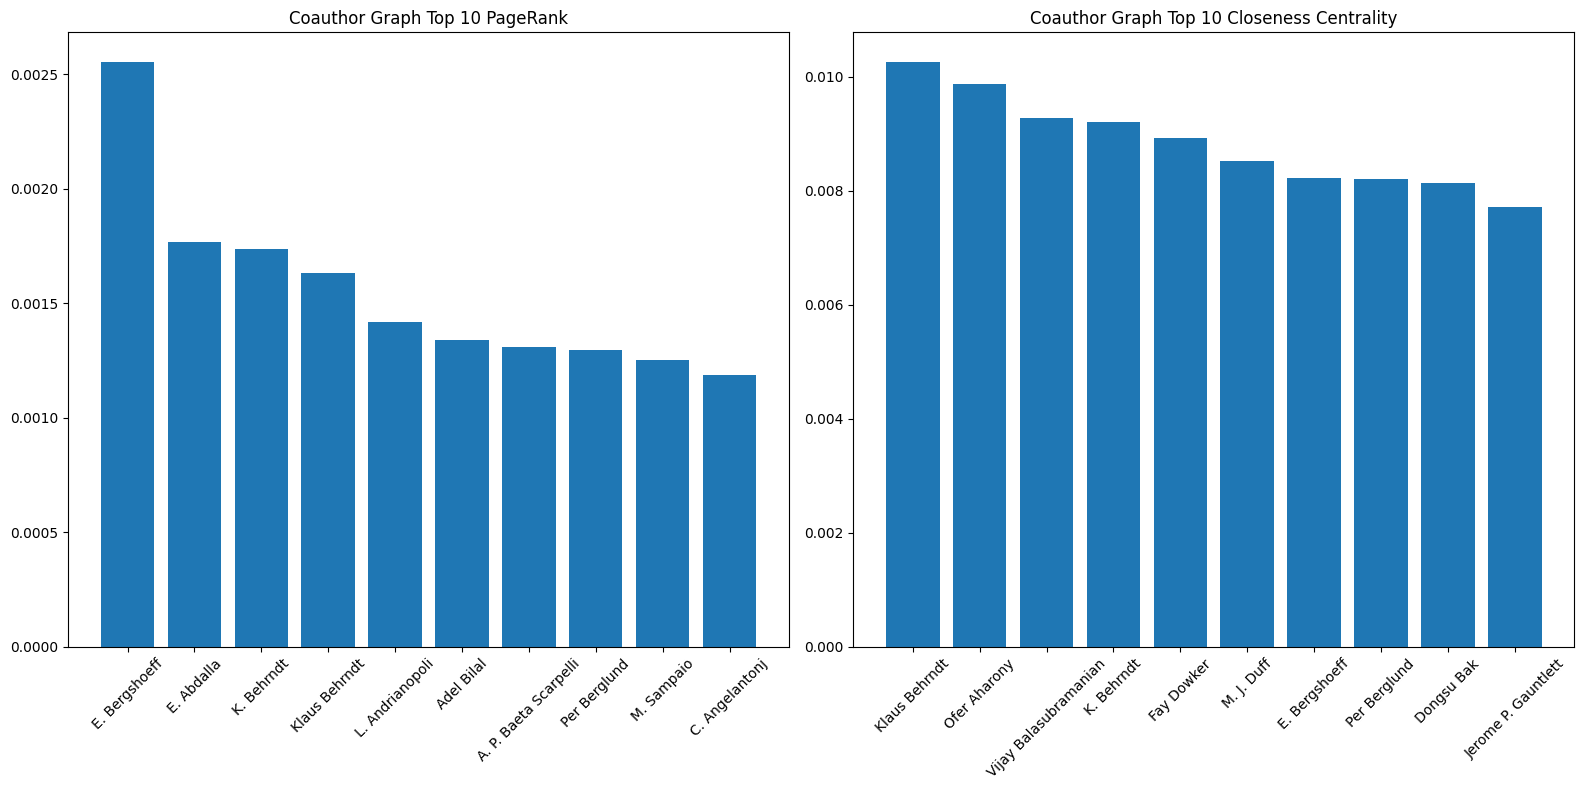

In [244]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G500 is your NetworkX graph
pagerank = nx.pagerank(g[2003])
closeness_centrality = nx.closeness_centrality(g[2003])
# betweenness_centrality = nx.betweenness_centrality(g[2003])
# eigenvector_centrality = nx.eigenvector_centrality(g[2003])

# Function to sort and get top 10
def get_top_10(centrality_dict):
    return sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Getting top 10 for each centrality measure
top_10_pagerank = get_top_10(pagerank)
top_10_closeness = get_top_10(closeness_centrality)
# top_10_betweenness = get_top_10(betweenness_centrality)
# top_10_eigenvector = get_top_10(eigenvector_centrality)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Helper function to plot top 10 nodes for a centrality measure
def plot_top_10(ax, top_10, title):
    nodes, values = zip(*top_10)
    ax.bar(range(len(nodes)), values, tick_label=nodes)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

# PageRank
plot_top_10(axs[0], top_10_pagerank, 'Coauthor Graph Top 10 PageRank')

# Closeness Centrality
plot_top_10(axs[1], top_10_closeness, 'Coauthor Graph Top 10 Closeness Centrality')

# Betweenness Centrality
# plot_top_10(axs[1, 0], top_10_betweenness, 'Top 10 Betweenness Centrality')

# Eigenvector Centrality
# plot_top_10(axs[1, 1], top_10_eigenvector, 'Top 10 Eigenvector Centrality')

plt.tight_layout()
plt.show()


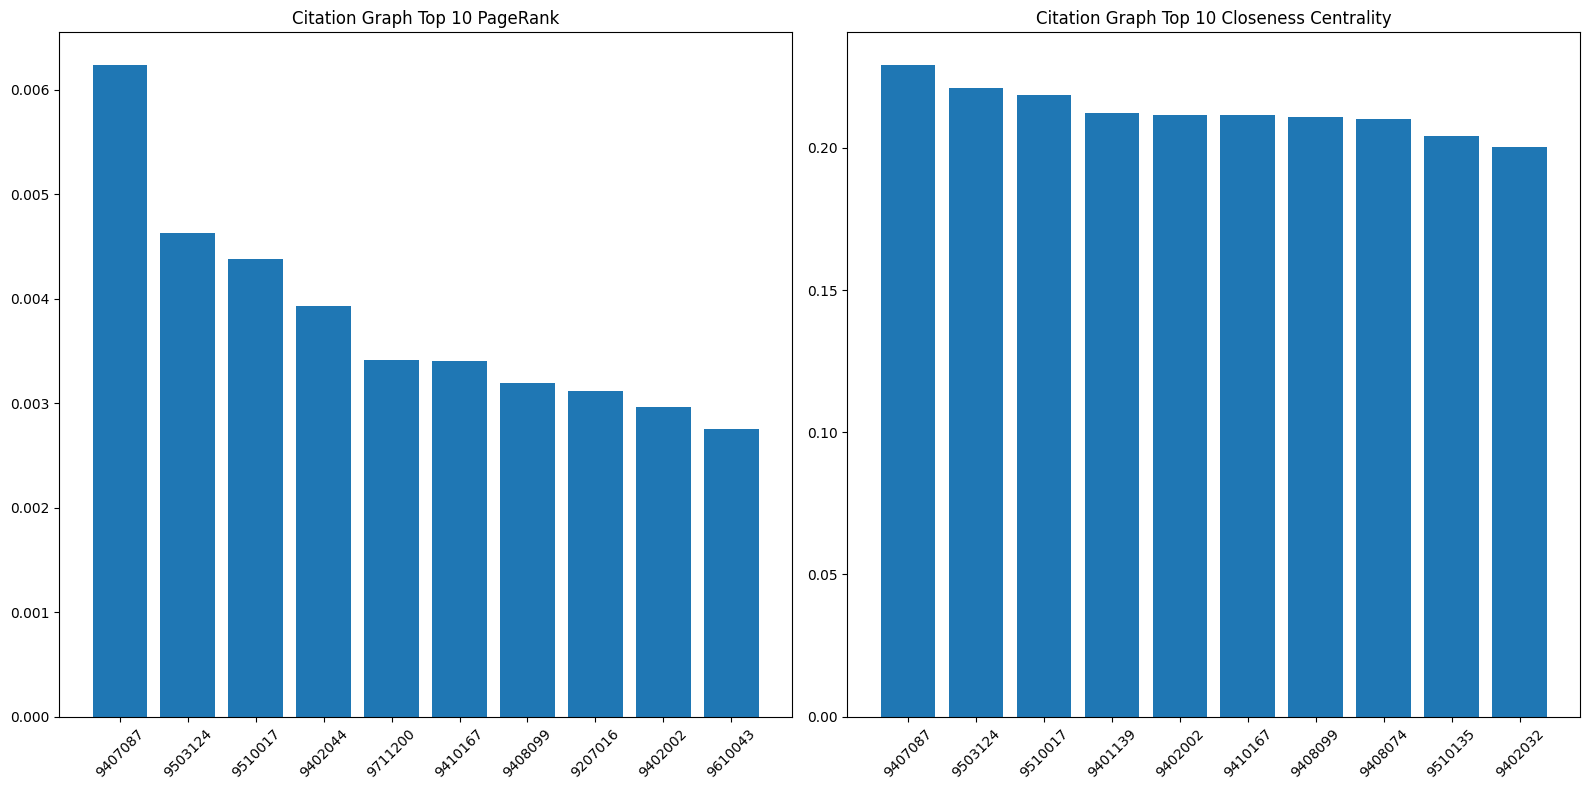

In [246]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Helper function to plot top 10 nodes for a centrality measure
def plot_top_10(ax, top_10, title):
    nodes, values = zip(*top_10)
    ax.bar(range(len(nodes)), values, tick_label=nodes)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

# PageRank
plot_top_10(axs[ 0], top_10_pagerank, 'Citation Graph Top 10 PageRank')

# Closeness Centrality
plot_top_10(axs[1], top_10_closeness, 'Citation Graph Top 10 Closeness Centrality')

# Betweenness Centrality
# plot_top_10(axs[1, 0], top_10_betweenness, 'Top 10 Betweenness Centrality')

# Eigenvector Centrality
# plot_top_10(axs[1, 1], top_10_eigenvector, 'Top 10 Eigenvector Centrality')

plt.tight_layout()
plt.show()